In [1]:
from datascience import *
import numpy as np
import math
import scipy.stats as stats

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Problem 1. 

Chronic exposure to asbestos fiber is a well-known health hazard. The article “The Acute Effects of Chrysotile Asbestos Exposure on Lung Function in the journal Envir. Res., 1978: 360-372 reports results of a study based on a sample of construction workers who had been exposed to asbestos over a prolonged period. 

Among the data given in the article were the following (ordered) values of pulmonary compliance (cm3/cm H20) for each of 16 subjects eight months after the exposure period (pulmonary compliance is a measure of lung elasticity, or how effectively the lungs are able to inhale and exhale):

In [2]:
PulComp = make_array(167.9, 180.8, 184.8, 189.8, 194.8, 200.2, 
                     201.9, 206.9, 207.2, 208.4, 226.3, 227.7, 
                     228.5, 232.4, 239.8, 258.6)

#### Q1. (2pts) Is the population distribution is normal? We didn't go over the normality test in class. But you can look at the documentation here https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [3]:
import numpy as np
from scipy.stats import normaltest
x = PulComp
k2, p = normaltest(x, axis=None)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.884455
The null hypothesis cannot be rejected


/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


The null hypothesis cannot be rejected, so the population distribution is normal.

#### Q2. (3pts) Compute a 95% confidence interval for the true average pulmonary compliance after such exposure. Show all work for full credit and justify using a z or t critical value.

In [4]:
n = 16 #For the confidence interval, since our data is small ( 𝑛≤30 ), we will the t-critical value.
pc_mean = PulComp.mean()
pc_std = np.std(PulComp, ddof=1)
pc_mean_std = pc_std/math.sqrt(n)
alpha = 0.05             # 95% confidence interval
df = n - 1     # degree of freedom
tcrit = stats.t.ppf(1-alpha/2, df)
CI_lower = pc_mean - tcrit*pc_mean_std
CI_upper = pc_mean + tcrit*pc_mean_std
print('The %d%s Confidence Interval is [%.5f, %.5f]'%
      (100*(1-alpha), '%', CI_lower, CI_upper))

The 95% Confidence Interval is [196.87808, 222.62192]


#### Q3. (2pts) A scan of the literature indicates that normal pulmonary compliance is about 250 cm3/cm H20. Is the mean pulmonary compliance from the exposed population statistically significantly different from this hypothetical “normal” value?

The 95% Confidence Interval is [196.87808, 222.62192]

The normal pulmonary compliance value is about 250 cm3/cm H20 ∉ CI.

The mean pulmonary compliance from the exposed population statistically significantly different from this hypothetical “normal” value.

#### Q4. (3pts) We want to test whether the mean of the exposed group equals the normal group. How would you set up the null hypothesis and alternative hypothesis? What is the p-value? Would you reject the null hypothesis at an significance level of 0.01? 

We want to test the effectiveness of this diet plan with a significant level 𝛼 = 0.01.

The hypothesis are:

H0 : 𝜇=250 cm3/cm H20

H1 : 𝜇!=250 cm3/cm H20

Since the population variance is unknown and we have a small sample, we will use the t-test.

In [5]:
alpha = 0.01
population_mean = 250
T_stat = (pc_mean - population_mean)/(pc_std/math.sqrt(n))
p_value = 2*stats.t.sf(abs(T_stat), df=n-1) 
print("p_value = {:g}".format(p_value))
if p_value < alpha:  # 𝜇=250  cm3/cm H20
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p_value = 7.54493e-06
The null hypothesis can be rejected


## Problem 2.

An investigator hypothesizes that in people free of diabetes, fasting blood glucose, a risk factor for coronary heart disease, is higher in those who drink at least 2 cups of coffee per day. A cross-sectional study is planned to assess the mean fasting blood glucose levels in people who drink at least two cups of coffee per day. 

The mean fasting blood glucose level in people free of diabetes is reported as 95.0 mg/dL with a standard deviation of 15 mg/dL. 

If the mean blood glucose level in people who drink at least 2 cups of coffee per day is 100 mg/dL, this would be important clinically. 

A one-sided test will be used with a 5% level of significance. 

#### Q1.  (2pts) Assume we enrolled a total of $n$ subjects. We will reject the null hypothesis if $\bar X$ is greater than or equal to what value? This should be a funciton of $n$. Note that we are running a *one-sided test*.

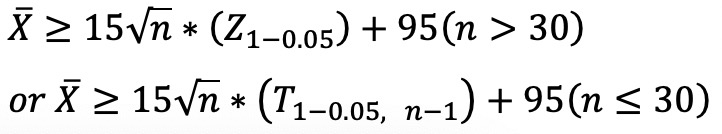

#### Q2. (3pts) Assume $n=50$. What would be the power of the test?

In [6]:
true_mean = 95
std = 15
n = 50
alpha = 0.05
z_crit = stats.norm.ppf(1-alpha)
z_crit = z_crit - (100-true_mean)/(std/math.sqrt(n))
power = stats.norm.sf(z_crit)
power

0.7618199274499504

#### Q3. (2pts) What is the power of the test for a general $n$. This should be a function of $n$.

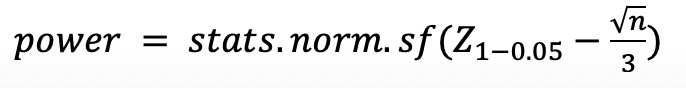

#### Q4. (3pts) How many patients should be enrolled in the study to ensure that the power of the test is 80%?

In [7]:
for n in range(1, 100):
    true_mean = 95
    std = 15
    alpha = 0.05
    z_crit = stats.norm.ppf(1-alpha)
    z_crit = z_crit - (100-true_mean)/(std/math.sqrt(n))
    power = stats.norm.sf(z_crit)
    if abs(power - 0.8) < 3e-3:
        print(n)

56


###### Problem 3.

In an effort to link cold environments with hypertension in humans, a preliminary experiment was conducted to investigate the effect of cold on hypertension in rats. Two random samples of 6 rats each were exposed to different environments. One sample of rats was held in a normal environment at 26 Celcius. The other sample was held in a cold 5 Celcius environment. Blood pressures and heart rates were measured for rats for both groups. The blood pressures for the 12 rats are contained in the file `RatBP.csv`.

We wish to test the following hypotheses:
$$H_0: \mu_{26C} = \mu_{5C}$$
$$H_1: \mu_{26C} \neq \mu_{5C}$$

Please conduct an analysis of this data by addressing the following questions.

#### Q1. (3pts) Provide a visual presentation of the data (e.g.stacked histogram) and speculate (before conducting any statistical tests) whether the populations appear different or not.

In [8]:
ratbp = Table.read_table('RatBP.csv')
ratbp.show()

Rat,Temp,BloodPressure
1,26,152
2,26,157
3,26,179
4,26,182
5,26,176
6,26,149
7,5,384
8,5,369
9,5,354
10,5,375


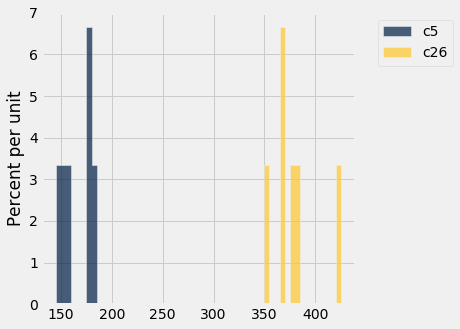

In [9]:
results = Table().with_columns(
    'c5', ratbp.column(2).take(np.arange(6)),
    'c26', ratbp.column(2).take(np.arange(6,12)),
    'number', ratbp.column(0).take(np.arange(6)))
results.hist(['c5','c26'], bins = np.arange(145, 430, 5),
            width=5, height=5)

#### Q2. (4pts) Check on the assumption of equal variances.

In [10]:
c26 = ratbp.column(2).take(np.arange(6))
c5 = ratbp.column(2).take(np.arange(6,12))
n1 = 6
n2 = 6

c26_mean = np.mean(c26)
c5_mean = np.mean(c5)
c26_std = np.std(c26, ddof = 1)
c5_std = np.std(c5, ddof = 1)

print('c26: num_rows =', n1, 
      'mean =',round(c26_mean,4), 
      'standard deviation', round(c26_std,4))
print('c5: num_rows =', n2,
      'mean =', round(c5_mean,4),
      'standard deviation', round(c5_std,4))

c26: num_rows = 6 mean = 165.8333 standard deviation 14.7705
c5: num_rows = 6 mean = 378.5 standard deviation 23.9562


In [11]:
F_stat = c5_std**2/c26_std**2
pval = 2*stats.f.sf(F_stat, n1-1, n2-1)
pval

0.31206001693857355

Since p-value is more than 0.05, we cannot reject the null hypothesis and thus will conclude that the two samples have the same variances.

#### Q3. (3pts) Assume normality holds and conduct the appropriate test. Draw some conclusions about the two populations. 

In [12]:
T_stat = abs(c26_mean - c5_mean)/math.sqrt(c26_std**2/n1+c5_std**2/n2)
pval = stats.t.sf(T_stat, n1-1+n2-1)*2
pval

4.569624795932069e-09

Since p-value is less than 0.05, we have enough evidence to reject the null hypothesis and conclude cold environments does have effects on hypertension in humans.

## Problem 4.

A pollution-control inspector suspected that a riverside community was releasing semitreated sewage into a river and this, as a consequence, was changing the level of dissolved oxygen of the river. To check this, he drew 15 randomly selected specimens of river water at a location above the town and another 15 specimens below the town. 

The dissolved oxygen readings, in parts per million, are given in the file `dissolvedO2.csv`. I would like you to answer some questions similar to those posed above only this time for the population of dissolved oxygen levels.

We wish to test the following hypotheses:
$$H_0: \mu_{above} = \mu_{below}$$
$$H_1: \mu_{above} > \mu_{below}$$

#### Q1. (3pts) Provide a visual presentation of the data (e.g. stacked histogram) and speculate (before conducting any statistical tests) whether the populations appear different or not.

In [13]:
diso = Table.read_table('dissolvedO2.csv')
diso.show()

Sample,Location,O2Level
1,Above,5.2
2,Above,4.8
3,Above,5.1
4,Above,5
5,Above,4.9
6,Above,4.8
7,Above,5
8,Above,4.7
9,Above,4.7
10,Above,5


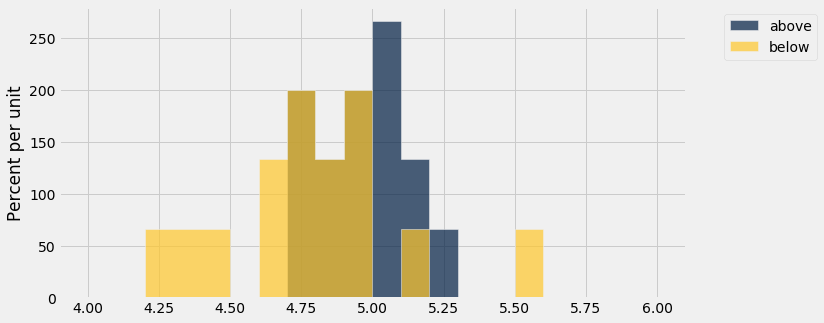

In [14]:
results = Table().with_columns(
    'above', diso.column(2).take(np.arange(15)),
    'below', diso.column(2).take(np.arange(15,30)),
    'number', diso.column(0).take(np.arange(15)))
results.hist(['above','below'], bins = np.arange(4, 6.1, 0.1),
            width=10, height=5)


#### Q2. (4pts) Check on the assumption of equal variances.

In [15]:
above = diso.column(2).take(np.arange(15))
below = diso.column(2).take(np.arange(15,30))
n1 = 15
n2 = 15

above_mean = np.mean(above)
below_mean = np.mean(below)
above_std = np.std(above, ddof = 1)
below_std = np.std(below, ddof = 1)

print('above: num_rows =', n1, 
      'mean =',round(above_mean,4), 
      'standard deviation', round(above_std,4))
print('below: num_rows =', n2,
      'mean =', round(below_mean,4),
      'standard deviation', round(below_std,4))

above: num_rows = 15 mean = 4.92 standard deviation 0.1568
below: num_rows = 15 mean = 4.74 standard deviation 0.3203


In [16]:
F_stat = below_std**2/above_std**2
pval = 2*stats.f.sf(F_stat, n1-1, n2-1)
pval

0.011488909560840461

Since p-value is less than 0.05, we have to reject the null hypothesis and conclude that the two samples have different variances.

#### Q3. (3pts) Assume normality holds and conduct the appropriate test. Draw some conclusions about the two populations. *Note that $H_1$ is one-sided*.

In [17]:
T_stat = abs(above_mean - below_mean)/math.sqrt(above_std**2/n1+below_std**2/n2)
v1 = above_std**2/n1
v2 = below_std**2/n2
df = ((v1+v2)**2)/((v1**2)/(n1-1)+(v2**2)/(n2-1))
print('df      =', df)
pval = stats.t.sf(T_stat, df)*2
print('p-value =', pval)

df      = 20.34349156497428
p-value = 0.06444806606116672


Since p-value is bigger than 0.05,we don't have enough evidence to reject the null hypothesis and conclude a riverside community was releasing semitreated sewage into a river and this, as a consequence, was changing the level of dissolved oxygen of the river.